# **IMDB Movie Analysis**

**Objective:**

As a data analyst intern at IMDB, you have been tasked with exploring and analyzing the IMDB Movies dataset. Your goal is to answer specific business questions, gain insights into movie trends, and deliver actionable recommendations. Using Python and libraries such as Pandas, NumPy, Seaborn, and Matplotlib, perform analysis to help IMDB better understand genre popularity, rating trends, and factors influencing movie success.


**Tools and Libraries Used**

Python

Pandas: Data manipulation and analysis

NumPy: Numerical computations

Matplotlib: Data visualization

Seaborn: Advanced visualization

**Dataset Overview**

The dataset includes the following columns:

*   names: Movie titles
*   date_x: Release dates
*   score: IMDB ratings
*   genre: Genres
*   overview: Movie summaries
*   crew: Cast and crew information
*   orig_title: Original titles
*   status: Release status (e.g., released, post-production)
*   orig_lang: Original language
*   budget_x: Production budgets
*   revenue: Box office revenues
*   country: Production country






In [1]:
# Install required packages (Colab usually has them pre-installed)
!pip install pandas numpy matplotlib seaborn scikit-learn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set style
sns.set(style="whitegrid")

# Project Setup and Data Loading

In [2]:
# upload dataset
from google.colab import files
uploaded = files.upload()

Saving imdb_movies.csv to imdb_movies.csv


In [3]:
#load CSV (adjust Filename If different )
df =pd.read_csv("imdb_movies.csv")

#show first 5 rows
df.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


In [4]:
#check the shape
print("Dataset shape (rows,columns):" , df.shape)
df.info()

Dataset shape (rows,columns): (10178, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


# Data Overview and Basic Exploration

In [5]:
#check dataset info
df.info()

#check missing values per column
df.isnull().sum().sort_values(ascending=False).head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


,0
genre,85
crew,56
date_x,0
names,0
score,0
overview,0
orig_title,0
status,0
orig_lang,0
budget_x,0


In [6]:
#summary statistic for numerical columns
df.describe()



,score,budget_x,revenue
count,10178.000000,1.017800e+04,1.017800e+04
mean,63.497052,6.488238e+07,2.531401e+08
std,13.537012,5.707565e+07,2.777880e+08
min,0.000000,1.000000e+00,0.000000e+00
25%,59.000000,1.500000e+07,2.858898e+07
50%,65.000000,5.000000e+07,1.529349e+08
75%,71.000000,1.050000e+08,4.178021e+08
max,100.000000,4.600000e+08,2.923706e+09


# Data Cleaning

In [7]:
#Missing Values
#Genre column have 85 missing values which contains Genres of movies
#Filling Genre with "Unavaiable" as its an object type
df["genre"]=df["genre"].fillna("unavaiable")

#Crew column have 56 missing values which contains Cast and crew information
#Filling it same with "Unavaiable" as its also an object type
df["crew"]=df["crew"].fillna("unavaiable")


# Univariate Analysis

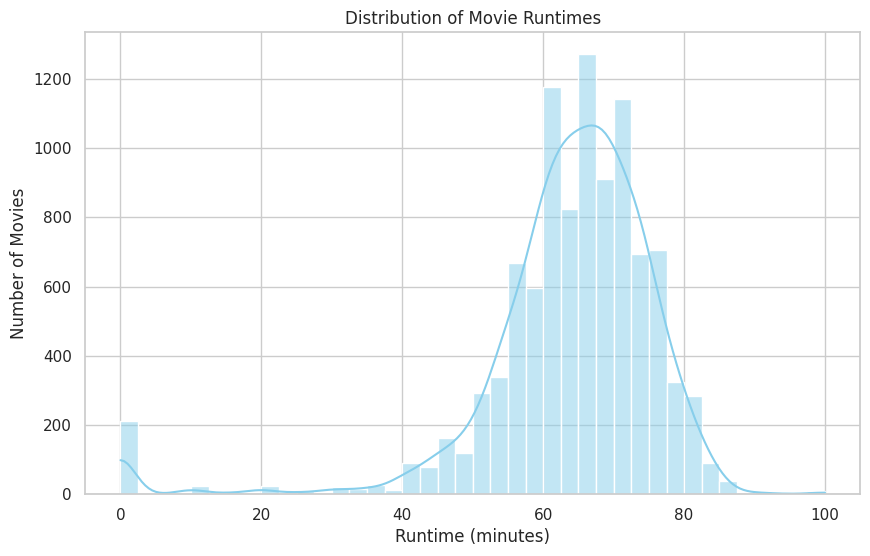

In [8]:
# Histogram of runtimes
plt.figure(figsize=(10,6))
sns.histplot(df['score'], bins=40, kde=True, color="skyblue")
plt.title("Distribution of Movie Runtimes")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Number of Movies")
plt.show()


In [ ]:
print(df.columns)

Index(['names', 'date_x', 'score', 'genre', 'overview', 'crew', 'orig_title',
       'status', 'orig_lang', 'budget_x', 'revenue', 'country', 'log_budget',
       'log_revenue'],
      dtype='object')


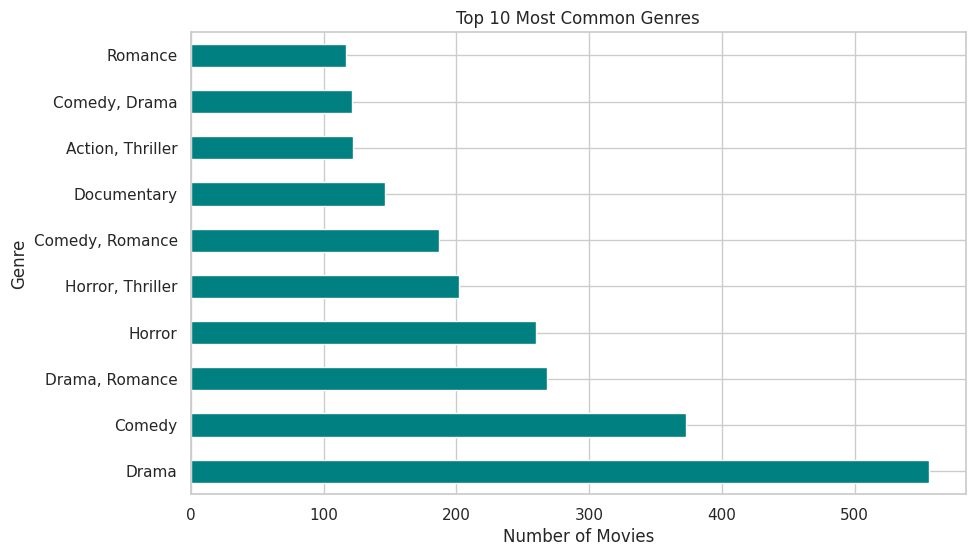

In [ ]:
# Countplot of top 10 genres
plt.figure(figsize=(10,6))
df['genre'].value_counts().head(10).plot(kind='barh', color="teal")
plt.title("Top 10 Most Common Genres")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.show()

# Bivariate Analysis: Explore relationships between two variables

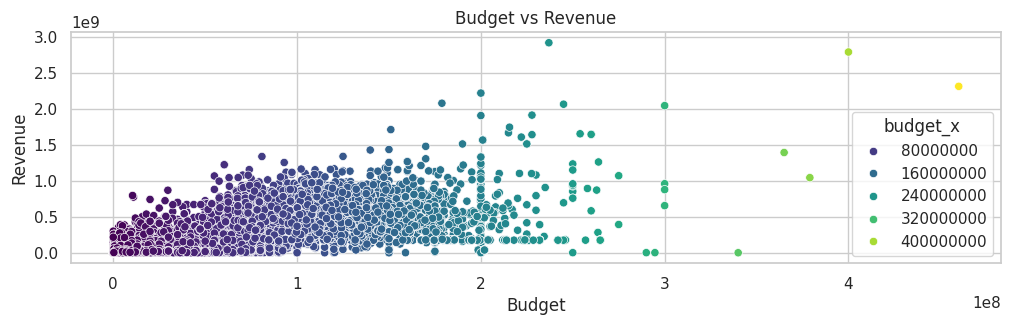

The relationship of budget and  revenue shows that:
- There is a positive correlation between budget and revenue. Movies with higher budgets tend to generate higher revenues.
- Most movies are clustered around mid-range budgets (e.g., 80 million).
- Outliers show both successes (high revenue, high budget) and failures (high budget, low revenue).


In [9]:
# Explore the relationship between `budget_x` and `revenue` using a scatter plot.
# Plotting the Scatter plot
plt.figure(figsize=(12,3))
sns.scatterplot(x="budget_x", y = "revenue",data = df, hue = "budget_x", palette = "viridis")
plt.title("Budget vs Revenue")
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.show()

# Description observed trend
print("The relationship of budget and  revenue shows that:")
print("- There is a positive correlation between budget and revenue. Movies with higher budgets tend to generate higher revenues.")
print("- Most movies are clustered around mid-range budgets (e.g., 80 million).")
print("- Outliers show both successes (high revenue, high budget) and failures (high budget, low revenue).")

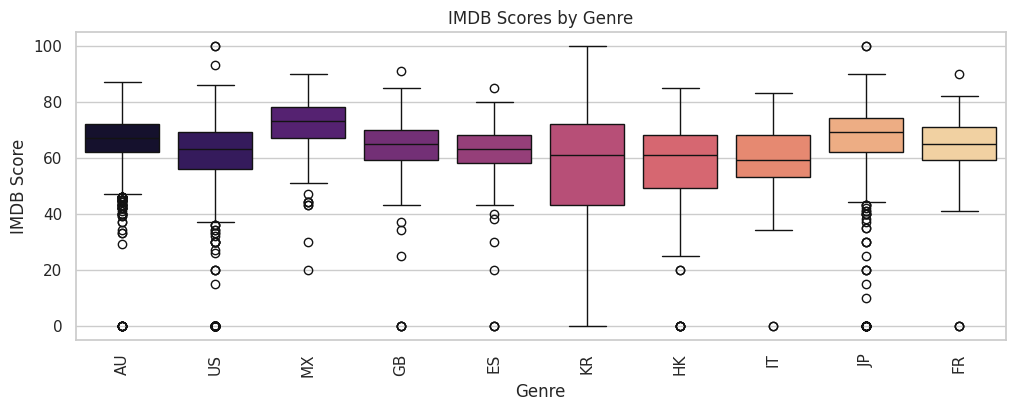

The IMDB score across contries:
- The distribution of ratings varies significantly across countries.
- Some countries exhibit tighter distributions, while others have a wider range of scores.
-The median rating differs by country, providing insight into regional preferences and quality of movies.


In [13]:
# Compare IMDB ratings (`score`) across Country using a boxplot.

# Boxplot for IMDB score across countries
top_countries = df["country"].value_counts().head(10).index  # Top 10 countries by movie count
plt.figure(figsize=(12, 4))
sns.boxplot(data=df[df["country"].isin(top_countries)], x="country", y="score", hue="country", palette="magma", legend=False)
plt.title("IMDB Scores by Genre")
plt.xlabel("Genre")
plt.ylabel("IMDB Score")
plt.xticks(rotation=90)
plt.show()

# Description
print("The IMDB score across contries:")
print("- The distribution of ratings varies significantly across countries.")
print("- Some countries exhibit tighter distributions, while others have a wider range of scores.")
print("-The median rating differs by country, providing insight into regional preferences and quality of movies.")

In [14]:
#Is there a correlation between the number of votes a movie received and its rating? Create a scatter plot and calculate the correlation coefficient.
# Create a dataframe to store score, budget and revenue and find it's correlation
df1 = df[["score", "budget_x", "revenue"]]
df1.columns = ["Score","Budget", "Revenue"]
corr = df1.corr()
corr

,Score,Budget,Revenue
Score,1.000000,-0.23547,0.096533
Budget,-0.235470,1.00000,0.673830
Revenue,0.096533,0.67383,1.000000


from matplotlib import pyplot as plt
corr['Score'].plot(kind='hist', bins=20, title='Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
corr['Budget'].plot(kind='hist', bins=20, title='Budget')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
corr['Revenue'].plot(kind='hist', bins=20, title='Revenue')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
corr.plot(kind='scatter', x='Score', y='Budget', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
corr.plot(kind='scatter', x='Budget', y='Revenue', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Revenue']
  ys = series['Score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = corr.sort_values('Revenue', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Revenue')
_ = plt.ylabel('Score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Revenue']
  ys = series['Budget']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = corr.sort_values('Revenue', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Revenue')
_ = plt.ylabel('Budget')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Revenue']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Revenue'}, axis=1)
              .sort_values('Revenue', ascending=True))
  xs = counted['Revenue']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = corr.sort_values('Revenue', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Revenue')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
corr['Score'].plot(kind='line', figsize=(8, 4), title='Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
corr['Budget'].plot(kind='line', figsize=(8, 4), title='Budget')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
corr['Revenue'].plot(kind='line', figsize=(8, 4), title='Revenue')
plt.gca().spines[['top', 'right']].set_visible(False)

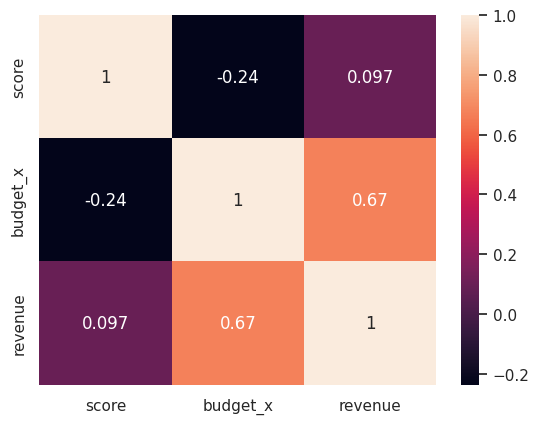

The Correlation between budget, score and revenue:
- Score and Budget: A weak negative correlation of -0.235, meaning as the budget increases, the score slightly decreases..
- Score and Revenue: A very weak positive correlation of 0.097, suggesting little to no relationship between score and revenue.
-Budget and Revenue: A moderate positive correlation of 0.674, indicating that as the budget increases, revenue tends to increase as well


In [15]:
#correlation between `budget_x`, 'revenue' and `score`.
correlation = df[["score","budget_x","revenue"]]
data = correlation.corr()
sns.heatmap(data, annot = True)
plt.show()

# Description
print("The Correlation between budget, score and revenue:")
print("- Score and Budget: A weak negative correlation of -0.235, meaning as the budget increases, the score slightly decreases..")
print("- Score and Revenue: A very weak positive correlation of 0.097, suggesting little to no relationship between score and revenue.")
print("-Budget and Revenue: A moderate positive correlation of 0.674, indicating that as the budget increases, revenue tends to increase as well")

# Genre-Specific Analysiss

In [20]:
# Calculate the average rating for each genre
avg_rating_by_genre = (
    df.groupby("genre")["score"]
    .mean()
    .sort_values(ascending=False)
)

# Take the top 10 genres
avg_rating_by_genre = avg_rating_by_genre.head(10)

print("\nAverage Ratings by Genre:")
print(avg_rating_by_genre)


Average Ratings by Genre:
genre
Fantasy, Drama, Crime                                 85.000000
Adventure, Animation, Comedy, Fantasy, Mystery        85.000000
Romance, Animation, Drama                             85.000000
Animation, Comedy, Romance                            84.666667
Family, Animation, Drama                              83.000000
Animation, Action, Comedy, Mystery, Crime, Fantasy    83.000000
Animation, Action, Science Fiction, Drama             83.000000
Animation, Action, Adventure, Fantasy, Thriller       83.000000
Animation, Family, Fantasy, Adventure, Comedy         83.000000
Adventure, Fantasy, Animation                         83.000000
Name: score, dtype: float64


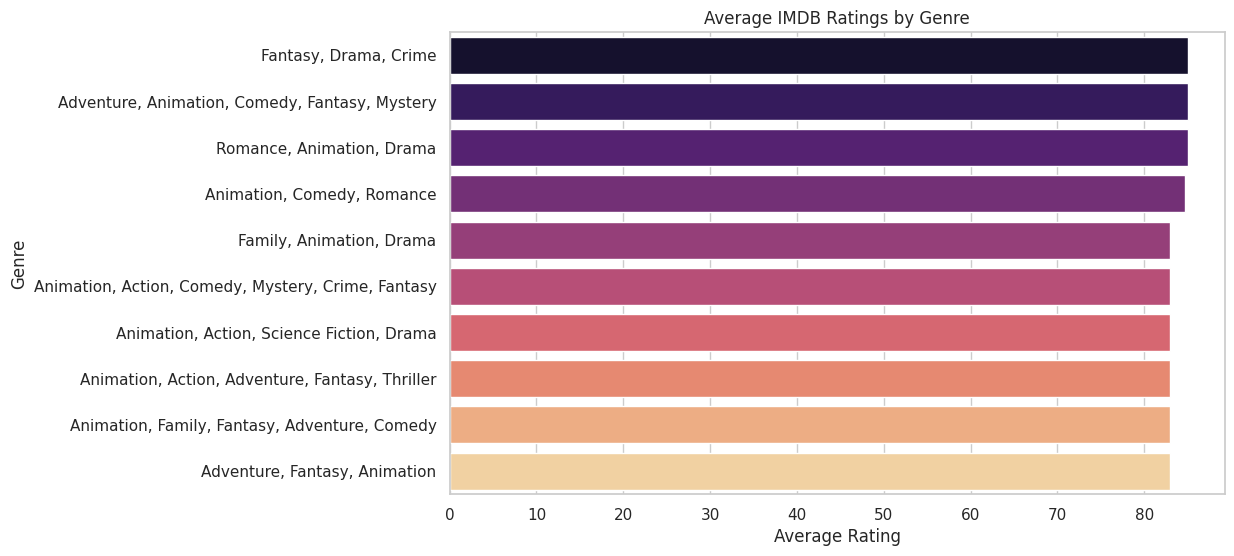

The Average rating for each genre shows that:
- It appears that (Fantasy, Drama, Crime)(Adventure, Animation, Comedy, Fantasy, Mystery)(Romance, Animation, Drama) have highest score.


In [22]:
# Plot the graph of average score across genres
plt.figure(figsize=(10, 6))
sns.barplot(
    y=avg_rating_by_genre.index,
    x=avg_rating_by_genre.values,
    hue=avg_rating_by_genre.index,
    palette="magma",
    legend=False
)
plt.title("Average IMDB Ratings by Genre")
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.show()

# Description
print("The Average rating for each genre shows that:")
print("- It appears that (Fantasy, Drama, Crime)(Adventure, Animation, Comedy, Fantasy, Mystery)(Romance, Animation, Drama) have highest score.")

In [23]:
# How does the popularity of genres vary over time? Plot the number of movies released per genre each year.

# Convert 'date_x' to datetime format if it's not already
df['date_x'] = pd.to_datetime(df['date_x'], errors='coerce')

# Extract the year from the 'date_x' column
df['year'] = df['date_x'].dt.year

# Check if the 'year' column is created correctly
print(df[['date_x', 'year']].head())

      date_x  year
0 2023-03-02  2023
1 2022-12-15  2022
2 2023-04-05  2023
3 2023-01-05  2023
4 2023-03-17  2023


In [24]:
# Group by 'genre' and 'year', then count movies
movies_per_genre = df.groupby(['year', 'genre']).size().reset_index(name='movie_count')
top_genres = movies_per_genre.groupby('genre')['movie_count'].sum().nlargest(10).index

# Filter the movies data to include only these top genres
filtered_movies = movies_per_genre[movies_per_genre['genre'].isin(top_genres)]

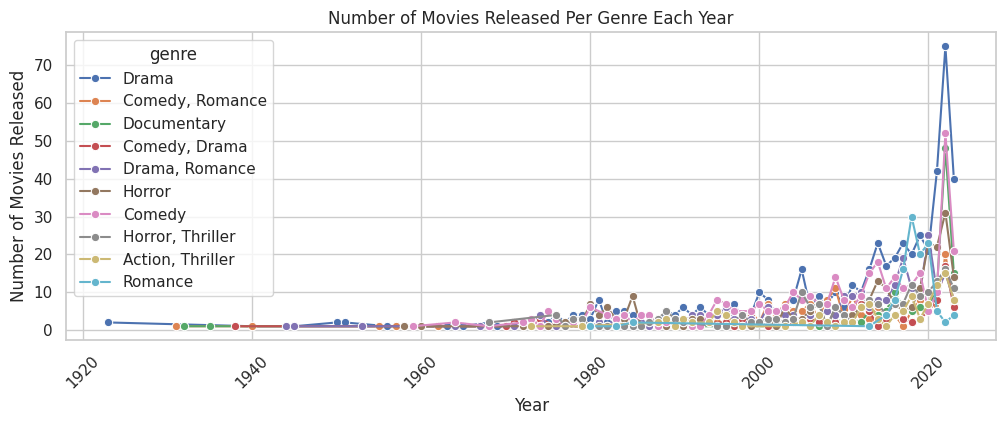

In [25]:
# Plotting Line
plt.figure(figsize=(12,4))
sns.lineplot(data=filtered_movies, x='year', y='movie_count', hue='genre', marker='o')
plt.title("Number of Movies Released Per Genre Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies Released")
plt.xticks(rotation=45)
plt.show()

In [26]:
# Compare budgets and revenues for specific genres.

# Filter data for specific genres
selected_genres = ['Action', 'Comedy', 'Drama']
df_selected_genres = df[df['genre'].isin(selected_genres)]

# Check the first few rows of the filtered data
print(df_selected_genres[['genre', 'budget_x', 'revenue']].head())

     genre    budget_x      revenue
4   Action  77000000.0  340941958.6
22   Drama  25000000.0  622313635.0
42  Action   1000000.0   22790427.2
44   Drama   3000000.0   36752010.0
54  Comedy  51880004.0    9263009.0


In [27]:
# Group by 'genre' and calculate the average budget and revenue
genre_comparison = df_selected_genres.groupby('genre')[['budget_x', 'revenue']].mean()

# Check the result
print(genre_comparison)

            budget_x       revenue
genre                             
Action  4.698863e+07  1.962566e+08
Comedy  5.767277e+07  2.052982e+08
Drama   6.068989e+07  2.495831e+08


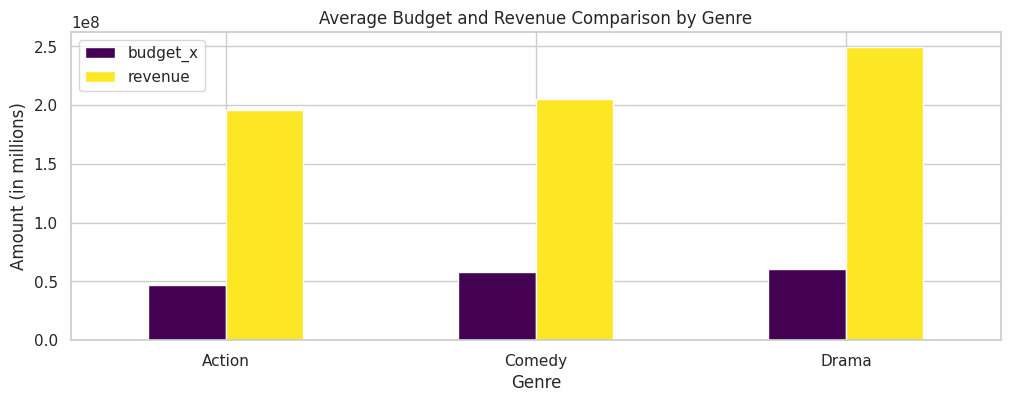

The Average Budget and revenue comparison by genre shows that:
- It shows that Drama Genre needs high budget.
- It also shows Action takes less budget than comdey and drama genre


In [29]:
# Plot the comparison of average budget and revenue per genre
genre_comparison.plot(kind='bar', figsize=(12,4 ),colormap='viridis')
plt.title("Average Budget and Revenue Comparison by Genre")
plt.xlabel("Genre")
plt.ylabel("Amount (in millions)")
plt.xticks(rotation=0)
plt.show()

# Description
print("The Average Budget and revenue comparison by genre shows that:")
print("- It shows that Drama Genre needs high budget.")
print("- It also shows Action takes less budget than comdey and drama genre")

# Year and Trend Analysis

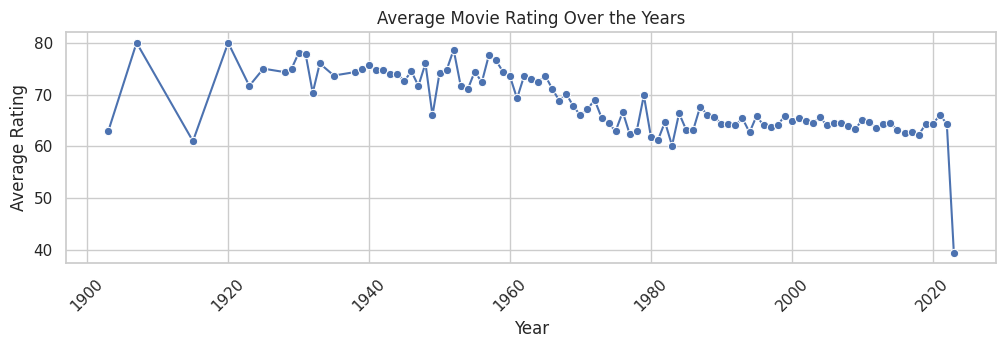

The Average Movie Rating over the years shows that:
- It shows from 1980 to 2020 the average rating Consistent Movie Quality
- There down fall after 2020 in movies may be because expectation of audience


In [30]:
# How has the average movie rating changed over the years? Plot the average rating for each year.

# Group by 'year' and calculate the average rating ('score') for each year
average_rating_per_year = df.groupby('year')['score'].mean().reset_index()

# Showing line plot for average movie changed over years
plt.figure(figsize=(12,3))
sns.lineplot(data=average_rating_per_year, x='year', y='score', marker='o', color='b')
plt.title("Average Movie Rating Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()

# Description
print("The Average Movie Rating over the years shows that:")
print("- It shows from 1980 to 2020 the average rating Consistent Movie Quality")
print("- There down fall after 2020 in movies may be because expectation of audience")

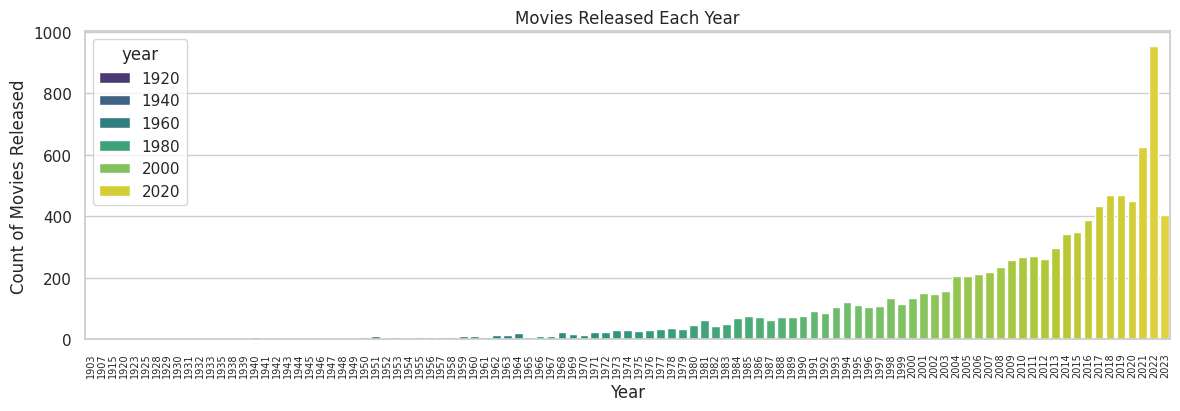

Year with the highest movie releases: 2022
Year with the lowest movie releases: 1903


In [36]:
# Which years had the highest and lowest number of movie releases? Plot the number of movies released each year

# Group by 'year' and count the number of movies released each year
gb4 = df.groupby('year').agg({'names': 'count'})

# Plot the number of movies released each year using a bar plot
plt.figure(figsize=(14,4))
sns.barplot(x=gb4.index, y=gb4['names'], hue=gb4.index, palette='viridis')
plt.ylabel('Count of Movies Released')
plt.xlabel('Year')
plt.title('Movies Released Each Year')
plt.xticks(rotation=90, fontsize=7)
plt.show()

# Find the year with the highest number of movie releases
highest_releases_year = gb4['names'].idxmax()  # This gives the year with the highest releases
print(f"Year with the highest movie releases: {highest_releases_year}")

# Find the year with the lowest number of movie releases
lowest_releases_year = gb4['names'].idxmin()  # This gives the year with the lowest releases
print(f"Year with the lowest movie releases: {lowest_releases_year}")

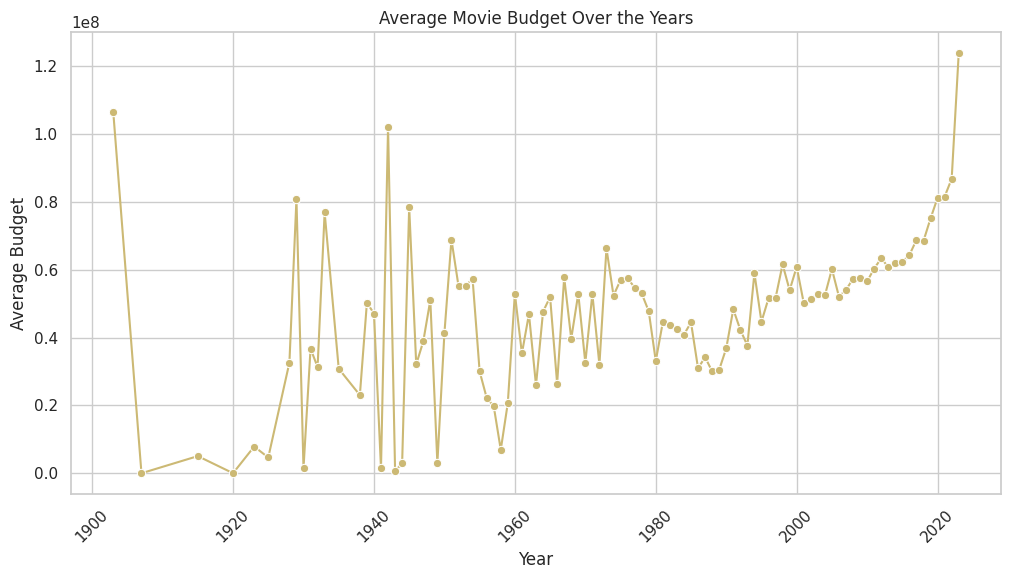

In [38]:
 #Do certain years show a higher average budget? Analyze the average budget by year and observe any trends.

# Group by 'year' and calculate the average budget for each year
average_budget_per_year = df.groupby('year')['budget_x'].mean()

# Plot the average budget per year using a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=average_budget_per_year.index, y=average_budget_per_year.values, marker='o', color='y')
plt.title("Average Movie Budget Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Budget")
plt.xticks(rotation=45)
plt.show()

# Multivariate Analysis

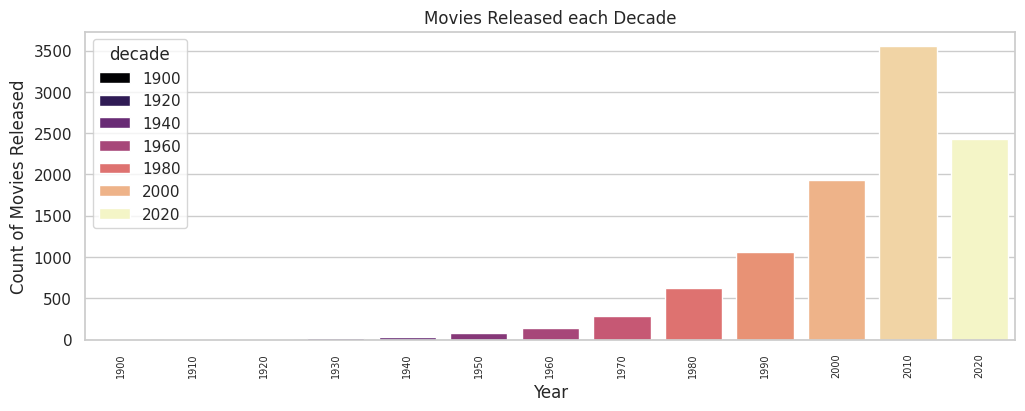

The Movies released each decade plot shows that:
- It shows in 2010 most movies was popular 


In [40]:
# Which genres are most popular in each decade? Create a bar plot showing the most frequent genres by decade.

# Extract the decade from the 'year' column
df['decade'] = (df['year'] // 10) * 10  # Dividing year by 10 and multiplying by 10 to get the start of the decade

# Plot the number of movies released each decade
gb = df.groupby('decade').agg({'genre':'count'})
plt.figure(figsize = (12, 4))
sns.barplot(x = gb.index, y = gb['genre'], data = gb, hue = gb.index, palette = 'magma')
plt.ylabel('Count of Movies Released')
plt.xlabel('Year')
plt.title('Movies Released each Decade')
plt.xticks(rotation = 90, fontsize = 7)
plt.show()

# Description
print("The Movies released each decade plot shows that:")
print("- It shows in 2010 most movies was popular ")

In [41]:
# Analyze the influence of `budget_x`, `genre`, and `country` on revenues using a heatmap.

# Select the relevant columns and drop any missing values
df_corr = df[['budget_x', 'genre', 'country', 'revenue']].dropna()

# Convert categorical columns into numeric values
df_corr['genre'] = pd.factorize(df_corr['genre'])[0]
df_corr['country'] = pd.factorize(df_corr['country'])[0]

# Calculate the correlation between the variables
corr_matrix = df_corr.corr()

print(corr_matrix)

          budget_x     genre   country   revenue
budget_x  1.000000 -0.013033  0.170086  0.673830
genre    -0.013033  1.000000 -0.024469 -0.012112
country   0.170086 -0.024469  1.000000  0.145555
revenue   0.673830 -0.012112  0.145555  1.000000


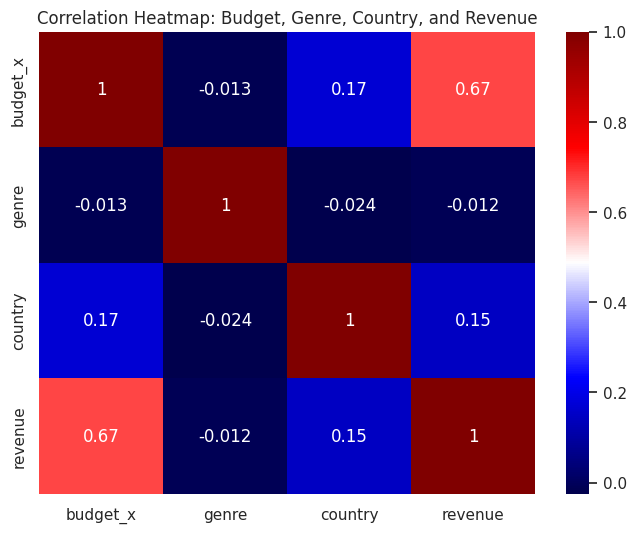

The correlation Heatmap shows that:
- Budget and revenue are positively correlated (0.67), suggesting that higher-budget movies tend to generate more revenue
- Genre and country have very weak correlations with other variables, indicating that the genre or the country of production does not strongly impact budget or revenue.
-Country has a weak positive correlation with revenue suggesting that movies from certain countries might tend to have slightly higher revenue.


In [42]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='seismic')
plt.title("Correlation Heatmap: Budget, Genre, Country, and Revenue")
plt.show()

# Description
print("The correlation Heatmap shows that:")
print("- Budget and revenue are positively correlated (0.67), suggesting that higher-budget movies tend to generate more revenue")
print("- Genre and country have very weak correlations with other variables, indicating that the genre or the country of production does not strongly impact budget or revenue.")
print("-Country has a weak positive correlation with revenue suggesting that movies from certain countries might tend to have slightly higher revenue.")

# Insights and Summary

Budget and Revenue Correlation
*   There is a strong positive correlation (0.67) between budget and revenue.
*   This means movies with higher budgets tend to generate more revenue.
*   Investing more in production is likely to lead to higher financial returns, but it does not guarantee success.
*   Some high-budget films still fail, while mid-budget films sometimes exceed expectations.

Consistent Movie Ratings Over Time


*  From 1980 to 2020, IMDB ratings remained relatively consistent, suggesting movie quality has not drastically changed.

*   A slight decline after 2020 is observed, possibly due to: Shifting audience expectations , Impact of the pandemic on movie-going experiences ,Changes in content production trends
*   This shows that while movie quality is stable, audience preferences are evolving.

Genre-Specific Trends in Budget and Ratings


*  Fantasy, Drama, and Crime genres receive higher average ratings compared to others.
*  Action movies often have lower budgets than Comedy and Drama, but can still achieve significant box-office success.
*  This implies that strong narratives in drama/fantasy films earn better ratings, while action films succeed with lower costs and mass popularity.














